<a href="https://colab.research.google.com/github/JonyeokLEE/python_COLAB/blob/main/regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

회귀(Regression)이란 가격이나 확률처럼 '연속된 실수값'을 정확히 예측하는 것이 목적.

선형 회귀(Linear Regression)는 데이터의 경향성을 가장 잘 설명하는 하나의 직선을 예측하는 것.

In [297]:
import numpy as np
import matplotlib.pyplot as plt

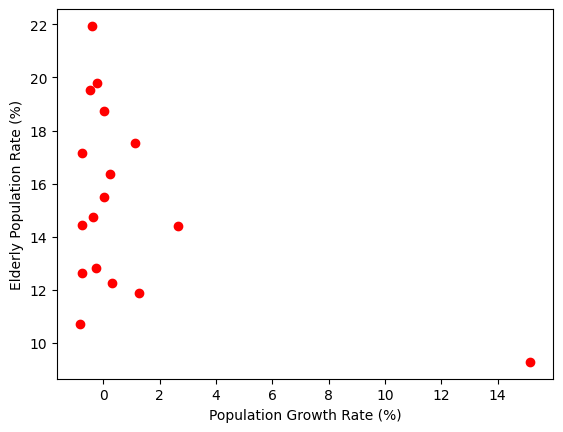

In [298]:
# 지역별 인구증가율과 고령인구비율 시각화
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc,population_old,'ro')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

오른쪽 아래에 치우친 하나의 점은 극단치(Outlier)라고 부르며, 일반적인 경향에서 벗어나는 사례

이 경우, 극단치를 제거하는 것이 낫다.

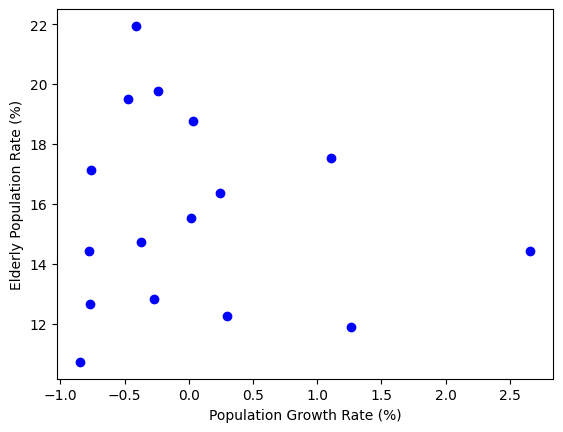

In [299]:
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc = population_inc[:5] + population_inc[6:]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

이 데이터로 선형 회귀를 한다.

잔차(residual): 데이터의 경향성을 잘 설명하는 하나의 직선과 각각의 데이터들의 차이
-> 이러한 잔차의 제곱을 최소화하는 알고리즘: 최소제곱알고리즘(Least Square Method)

최소제곱법으로 직선 y = ax + b의 a(기울기)와 b(y절편)을 구할 수 있다.

In [300]:
# LSM
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X와 Y의 평균
x_bar = sum(X)/len(X)
y_bar = sum(Y)/len(Y)

# 최소제곱법으로 a, b를 구한다.
a = sum([(y-y_bar)*(x-x_bar) for y, x in list(zip(Y,X))]) # list(zip(list_1,list_2))는 두 개 이상의 리스트를 하나로 묶어주는 기법
a /= sum([(x-x_bar)**2 for x in X])
b = y_bar - a * x_bar

In [301]:
print("a: ",a,"b: ",b)

a:  -0.355834147915461 b:  15.669317743971302


In [302]:
line_x = np.arange(min(X),max(X),0.01)
line_y = a * line_x + b

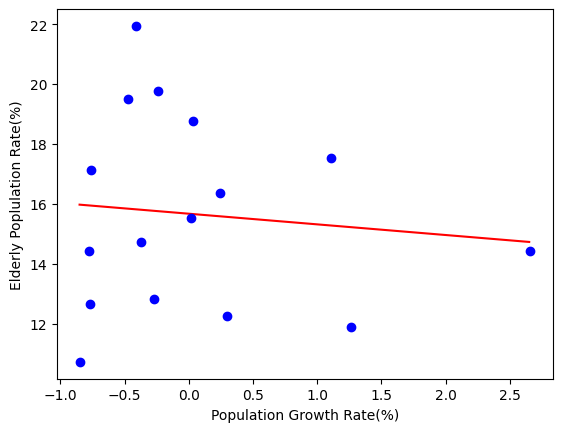

In [303]:
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')

plt.xlabel('Population Growth Rate(%)')
plt.ylabel('Elderly Poplulation Rate(%)')
plt.show()

In [304]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

In [305]:
# a와 b를 random한 값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())

In [306]:
# 잔차의 제곱의 평균을 반환하는 함수
def compute_loss():
  y_pred = a * X + b
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

In [307]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.07)

for i in range(1000):
  # 잔차의 제곱의 평균을 Minimize
  optimizer.minimize(compute_loss, var_list=[a,b])

  if i % 100 == 0:
    print(i,'a: ',a.numpy(),'b: ', b.numpy(),'loss: ', compute_loss().numpy())

0 a:  0.13882715 b:  0.79417527 loss:  230.60873
100 a:  0.10033243 b:  7.1386175 loss:  82.38485
200 a:  -0.13526142 b:  11.530869 loss:  26.867838
300 a:  -0.2676897 b:  14.015404 loss:  12.50989
400 a:  -0.32722437 b:  15.132488 loss:  10.068321
500 a:  -0.34832904 b:  15.528493 loss:  9.80059
600 a:  -0.35425073 b:  15.63961 loss:  9.781684
700 a:  -0.3555679 b:  15.664326 loss:  9.780828
800 a:  -0.35579896 b:  15.668658 loss:  9.780803
900 a:  -0.3558304 b:  15.669251 loss:  9.780804


In [308]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

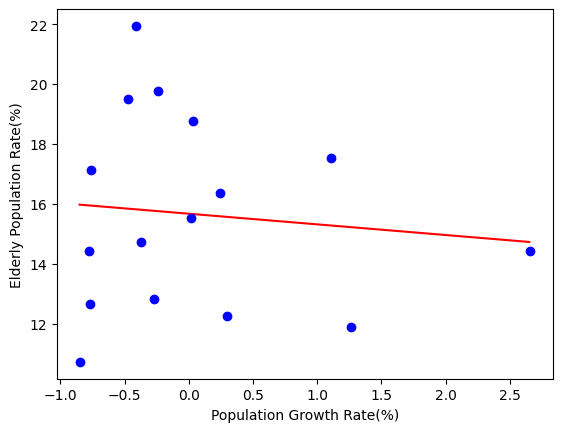

In [309]:
plt.plot(line_x, line_y, 'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate(%)')
plt.ylabel('Elderly Population Rate(%)')
plt.show()

이하 다항회귀
선형회귀와는 다르게 직선인 ax + b 대신 2차 함수인 ax^2 + bx + c를 회귀선으로 사용

In [310]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

In [311]:
# a와 b와 c를 random한 값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

In [312]:
# 잔차의 제곱의 평균을 반환하는 함수
def compute_loss():
  y_pred = a * X*X + b * X + c
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

In [313]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.07)

for i in range(1000):
  # 잔차의 제곱의 평균을 Minimize
  optimizer.minimize(compute_loss, var_list=[a,b,c])

  if i % 100 == 0:
    print(i,'a: ',a.numpy(),'b: ', b.numpy(),'c:',c.numpy(),'loss: ', compute_loss().numpy())

0 a:  0.7783372 b:  0.3179015 c: 0.6874808 loss:  218.80215
100 a:  3.9577954 b:  -5.73927 c: 6.609731 loss:  66.80612
200 a:  2.7138152 b:  -4.510429 c: 10.441042 loss:  30.476425
300 a:  1.2129945 b:  -2.2369673 c: 13.050207 loss:  15.573393
400 a:  0.27593264 b:  -0.8063222 c: 14.655729 loss:  10.826301
500 a:  -0.21581754 b:  -0.05593446 c: 15.499837 loss:  9.692147
600 a:  -0.4378097 b:  0.2827855 c: 15.881023 loss:  9.487314
700 a:  -0.5243298 b:  0.4147974 c: 16.029594 loss:  9.459262
800 a:  -0.553481 b:  0.45927742 c: 16.079653 loss:  9.456352
900 a:  -0.56196105 b:  0.47221565 c: 16.094215 loss:  9.456125


In [314]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

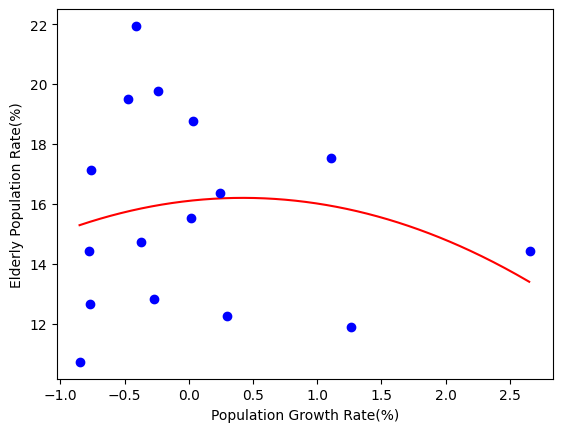

In [315]:
plt.plot(line_x, line_y, 'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate(%)')
plt.ylabel('Elderly Population Rate(%)')
plt.show()

99 a: -1.0273409 b: 5.4911675 c: -4.0288434 d: 6.677428 loss: 60.372997
199 a: -1.8951973 b: 6.4927564 c: -2.1323721 d: 10.192412 loss: 29.133047
299 a: -1.5836715 b: 4.854724 c: -0.8898241 d: 12.294196 loss: 19.236752
399 a: -0.8536987 b: 2.5843132 c: -0.57016677 d: 13.7451315 loss: 13.792007
499 a: -0.1634295 b: 0.56555945 c: -0.4814404 d: 14.837671 loss: 10.70558
599 a: 0.37357295 b: -0.9891091 c: -0.43843445 d: 15.652022 loss: 9.141041
699 a: 0.75645286 b: -2.0957294 c: -0.41072735 d: 16.22826 loss: 8.434964
799 a: 1.0120373 b: -2.8341658 c: -0.39264452 d: 16.61224 loss: 8.150684
899 a: 1.1732477 b: -3.2973723 c: -0.38125563 d: 16.853065 loss: 8.048565
999 a: 1.267057 b: -3.5708992 c: -0.37467402 d: 16.995184 loss: 8.015821


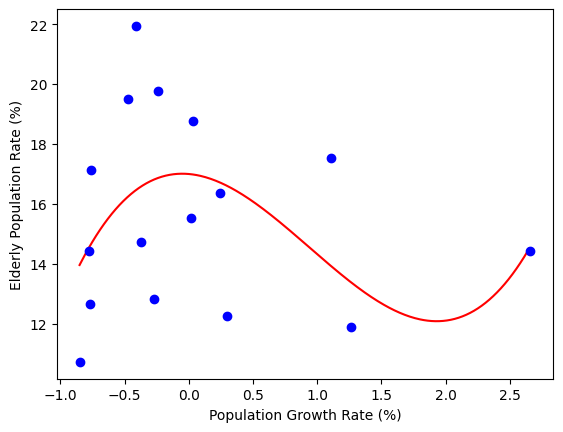

In [316]:
# 3차 함수로도 적용
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c, d를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X*X + b * X*X + c * X + d
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(learning_rate=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c,d])

    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'd:', d.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

Neuron Chapter에서 만든 AND/OR/XOR 연산을 하는 Network처럼, 회귀에서도 딥러닝 네트워크를 만들 수 있다.

이 방식은 회귀식을 가정하고 변수를 직접 추정하지 않고, 딥러닝 네트워크를 이용해 회귀선을 예측하는 방법.

In [317]:
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation = 'tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

In [318]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.1), loss = 'mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6)                 12        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [319]:
model.fit(X, Y, epochs=10)
# loss에 변화가 거의 없다면, 학습이 거의 다 된 것.

Epoch 1/10
1/1 [==============================] - 1s 764ms/step - loss: 253.4906
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 109.6633
Epoch 3/10
1/1 [==============================] - 0s 15ms/step - loss: 10.7196
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 9.8084
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 9.6986
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 9.6576
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 9.6341
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 9.6167
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 9.6015
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 9.5868


In [320]:
model.predict(X)

1/1 [==============================] - 0s 91ms/step


array([[15.739363],
       [15.91026 ],
       [15.005734],
       [15.836531],
       [15.154258],
       [15.764933],
       [15.892347],
       [15.913215],
       [15.910838],
       [15.906833],
       [15.905383],
       [15.909858],
       [15.896347],
       [15.839285],
       [15.911387],
       [13.830456]], dtype=float32)

11/11 [==============================] - 0s 2ms/step


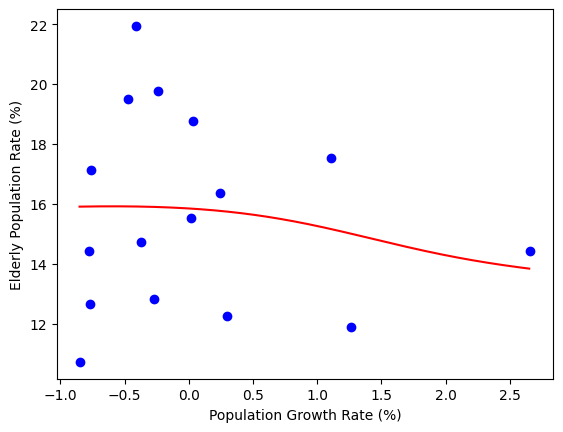

In [321]:
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(X,Y,'bo')

plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()